# Task1

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
from matplotlib.patches import Ellipse
%matplotlib inline

## Setting up the environment

In [12]:
input_photo_path = "data/photo.jpg"
apps_logs_path = "data/apps.jpg"
ucu_logs_path = "data/ucu.jpg"

## Loading the data

In [13]:
input_photo = cv2.imread(input_photo_path, 0)
apps_logs = cv2.imread(apps_logs_path, 0)
ucu_logs = cv2.imread(ucu_logs_path, 0)

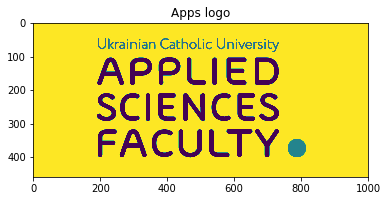

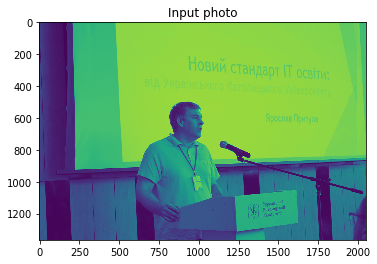

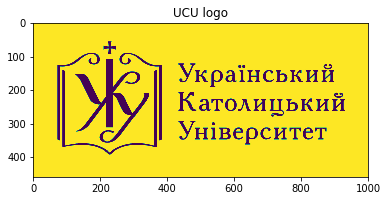

In [14]:
plt.imshow(apps_logs)
plt.title('Apps logo')
plt.show()

plt.imshow(input_photo)
plt.title('Input photo')
plt.show()

plt.imshow(ucu_logs)
plt.title('UCU logo')
plt.show()

## Find descriptors

In [15]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(input_photo, None)
kp2, des2 = sift.detectAndCompute(ucu_logs, None)

kp = sift.detect(ucu_logs,None)
img= cv2.drawKeypoints(ucu_logs,kp,input_photo)
cv2.imwrite('data/sift_keypoints.jpg', img)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
matches = sorted(matches, key = lambda x:x[0].distance)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

best_10_matches = good[:10]

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(input_photo,kp1,ucu_logs,kp2,best_10_matches, None, flags=2)

plt.imshow(img3),plt.show()

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [ ]:
src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in best_10_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in best_10_matches ]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist()

h,w = input_photo.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)

img2 = cv2.polylines(ucu_logs,[np.int32(dst)],True,255,3, cv2.LINE_AA)

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

flatten = lambda l: [item for sublist in l for item in sublist]

img3 = cv2.drawMatches(input_photo,kp1,img2,kp2,flatten(best_10_matches),None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

In [ ]:
rect = np.zeros((4, 2), dtype = "float32")

s = pts.sum(axis = 1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]

diff = np.diff(pts, axis = 1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]

rect *= ratio